Copyright 2019 D-Wave Systems, Inc.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [1]:
# ------ Import necessary packages ----
from collections import defaultdict

In [2]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from matplotlib import pyplot as plt
import networkx as nx

------- Set up our graph -------

In [3]:
# Create empty graph
G = nx.Graph()

In [4]:
# Add edges to the graph (also adds nodes)
G.add_edges_from([(1,2),(1,3),(2,4),(3,4),(3,5),(4,5)])

------- Set up our QUBO dictionary -------

In [5]:
# Initialize our h vector, J matrix
h = defaultdict(int)
J = defaultdict(int)

In [6]:
# Update J matrix for every edge in the graph
for i, j in G.edges:
    J[(i,j)]+= 1

In [7]:
# ------- Run our QUBO on the QPU -------
# Set up QPU parameters
chainstrength = 2
numruns = 10

In [8]:
# Run the QUBO on the solver from your config file
sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_ising(h, J,
                                chain_strength=chainstrength,
                                num_reads=numruns,
                                label='Example - Maximum Cut Ising')

In [9]:
# ------- Print results to user -------
print('-' * 60)
print('{:>15s}{:>15s}{:^15s}{:^15s}'.format('Set 0','Set 1','Energy','Cut Size'))
print('-' * 60)
for sample, E in response.data(fields=['sample','energy']):
    S0 = [k for k,v in sample.items() if v == -1]
    S1 = [k for k,v in sample.items() if v == 1]
    print('{:>15s}{:>15s}{:^15s}{:^15s}'.format(str(S0),str(S1),str(E),str(int((6-E)/2))))

------------------------------------------------------------
          Set 0          Set 1    Energy        Cut Size    
------------------------------------------------------------
      [2, 3, 5]         [1, 4]     -4.0             5       
      [1, 4, 5]         [2, 3]     -4.0             5       
         [1, 4]      [2, 3, 5]     -4.0             5       


In [10]:
# ------- Display results to user -------
# Grab best result
# Note: "best" result is the result with the lowest energy
# Note2: the look up table (lut) is a dictionary, where the key is the node index
#   and the value is the set label. For example, lut[5] = 1, indicates that
#   node 5 is in set 1 (S1).
lut = response.first.sample

In [11]:
# Interpret best result in terms of nodes and edges
S0 = [node for node in G.nodes if lut[node]==-1]
S1 = [node for node in G.nodes if lut[node]==1]
cut_edges = [(u, v) for u, v in G.edges if lut[u]!=lut[v]]
uncut_edges = [(u, v) for u, v in G.edges if lut[u]==lut[v]]

{1: Text(-0.9007649397068983, -0.1400020840037282, '1'),
 2: Text(-0.5551829640547927, 0.7232582486818727, '2'),
 3: Text(0.06738162943623928, -0.4924154631106684, '3'),
 4: Text(0.3885662743254513, 0.3097115395774374, '4'),
 5: Text(1.0, -0.40055224114491356, '5')}

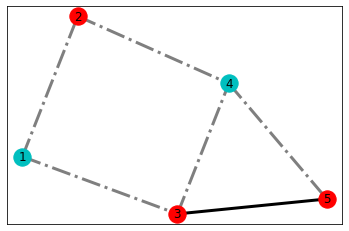

In [12]:
# Display best result
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color='c')
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, style='dashdot', alpha=0.5, width=3)
nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style='solid', width=3)
nx.draw_networkx_labels(G, pos)

In [ ]:
filename = "maxcut_plot_ising.png"
plt.savefig(filename, bbox_inches='tight')
print("\nYour plot is saved to {}".format(filename))